In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('../../mogi_after_parsing.csv')
df.head()

,title,description,property_type,transaction_type,price,province,district,ward,street,location_latitude,location_longitude,owner_name,owner_contact,area,bedrooms,bathrooms
0,"Nhà [4x16] 2 lầu 3 phòng ngủ 4wc, Đường số 5, ...","Nhà cho thuê, Đường số 5, Phường Bình Hưng Hoà...",room,rent,12.0,TPHCM,Bình Tân,Bình Hưng Hòa,Đường số 5,106.605865,10.806956,CHUYÊN NHÀ THUÊ Q. BÌNH TÂN,779561865,192,3,4
1,"Garden Gate 88m2,3pn full nthat chỉ 19tr ở liền",******* Siêu rẻ siêu hót bảo đảm không có căn ...,room,rent,19.0,TPHCM,Phú Nhuận,9,Phổ Quang,106.674435,10.809511,Cho thuê Căn hộ giá rẻ,779196231,88,3,2
2,"Celadon city 85m2,3pn full nthat chỉ 12tr ở li...","***** Cho thuê căn hộ Celadon City Khu Ruby, Đ...",room,rent,12.0,TPHCM,Tân Phú,Sơn Kỳ,Đường N1,106.611832,10.803610,Cho thuê Căn hộ giá rẻ,779196231,85,3,2
3,"Botanica Premier 100m2,3pn full nthat chỉ 20tr...",****** Cho thuê căn hộ cao cấp Botanica Premie...,room,rent,20.0,TPHCM,Tân Bình,2,Hồng Hà,106.667713,10.807054,Cho thuê Căn hộ giá rẻ,779196231,100,3,2
4,Cho thuê Sunrise CityView Q7 giá rẻ Lh :,Cần cho thuê nhanh căn hộ Sunrise CityView Q7 ...,room,rent,20.0,TPHCM,7,Tân Hưng,Nguyễn Hữu Thọ,106.698891,10.745583,Minh Anh,859999822,108,3,2


# Data exploration

In [3]:
# Drop columns that are not needed
df.drop(['title', 'description', 'transaction_type', 'owner_name', 'owner_contact', 'property_type', 'street'], axis=1, inplace=True)
df.head()

,price,province,district,ward,location_latitude,location_longitude,area,bedrooms,bathrooms
0,12.0,TPHCM,Bình Tân,Bình Hưng Hòa,106.605865,10.806956,192,3,4
1,19.0,TPHCM,Phú Nhuận,9,106.674435,10.809511,88,3,2
2,12.0,TPHCM,Tân Phú,Sơn Kỳ,106.611832,10.803610,85,3,2
3,20.0,TPHCM,Tân Bình,2,106.667713,10.807054,100,3,2
4,20.0,TPHCM,7,Tân Hưng,106.698891,10.745583,108,3,2


In [4]:
df.shape

(48016, 9)

In [5]:
df.keys()

Index(['price', 'province', 'district', 'ward', 'location_latitude',
       'location_longitude', 'area', 'bedrooms', 'bathrooms'],
      dtype='object')

In [6]:
# Check Nan values in df and remove it
df.isnull().sum()
df.dropna(inplace=True)


# Data visualization

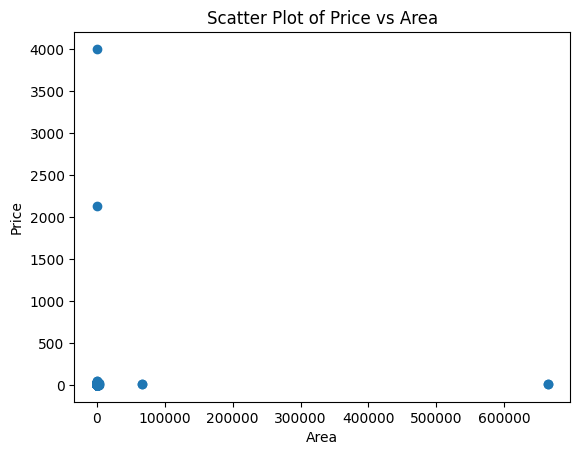

In [7]:
plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Area')
plt.show()


# Data processing

In [8]:
# Change "quận 2" and "Quận 2 (Tp Thủ Đức)" to "Quận 2"
df['district'] = df['district'].replace('Quận 2 (Tp Thủ Đức)', 'Quận 2')

In [9]:
# Change province, ward, street from categorical to numerical value
from sklearn.preprocessing import LabelEncoder

le_district = LabelEncoder()
le_province = LabelEncoder()
le_ward = LabelEncoder()

df["district"] = le_district.fit_transform(df['district'])
df["province"] = le_province.fit_transform(df['province'])
df["ward"] = le_ward.fit_transform(df['ward'])
df.head()

,price,province,district,ward,location_latitude,location_longitude,area,bedrooms,bathrooms
0,12.0,23,17,59,106.605865,10.806956,192,3,4
1,19.0,23,48,28,106.674435,10.809511,88,3,2
2,12.0,23,86,270,106.611832,10.803610,85,3,2
3,20.0,23,85,11,106.667713,10.807054,100,3,2
4,20.0,23,9,340,106.698891,10.745583,108,3,2


In [10]:
# Spilt data into training and testing dataset
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# RANDOM FOREST ALGORITHM

In [11]:
re_model = RandomForestRegressor(n_estimators=100, random_state=42)
re_model.fit(X_train, y_train)
y_pred = re_model.predict(X_test)
y_pred

array([ 8.29524802,  7.591705  ,  3.97099879, ..., 12.03469231,
       18.46531394,  9.18186905])

# Evaluation

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# Predict the target variable
y_pred = re_model.predict(X_test)

print('---Random Forest Regressor---')

# Calculate the MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate the RSqared
rsquared = r2_score(y_test, y_pred)
print('R-squared:', rsquared)

# Calculate the RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)


---Random Forest Regressor---
Mean Absolute Error (MAE): 1.1848208553224218
Mean Squared Error (MSE): 3.824234047697211
R-squared: 0.8500498490813639
Root Mean Squared Error (RMSE): 1.955564892223526


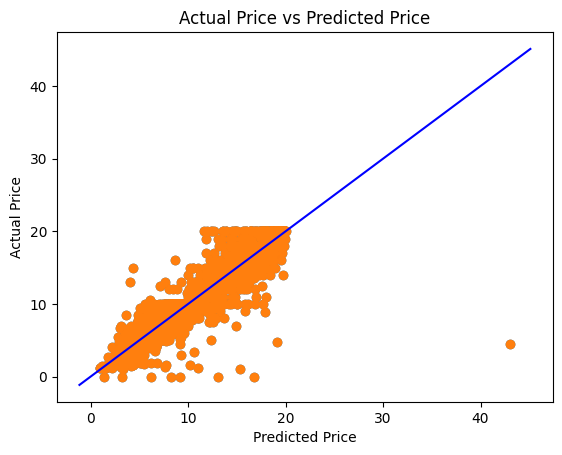

In [13]:
# do a scatter plot of the predicted price vs the actual price
plt.scatter(y_pred, y_test)
plt.ylabel('Actual Price')
import matplotlib.pyplot as plt



plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual Price vs Predicted Price')

limits = [np.min([plt.xlim(), plt.ylim()]),  # min of both axes
          np.max([plt.xlim(), plt.ylim()])]  # max of both axes

plt.plot(limits, limits, 'b-')  # 'b-' means blue color, solid line


plt.xlim()
plt.ylim()
plt.show()

In [14]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare.head(20)

,Actual,Predicted
21632,7.000,8.295248
32405,10.000,7.591705
45486,5.000,3.970999
22090,14.000,13.660088
6266,4.200,3.855772
44364,4.800,3.920600
11668,3.500,5.301555
28486,9.000,9.362718
14545,10.000,16.840000
44336,5.500,5.169121


# KNN ALGORITHM

In [15]:
# Choose n_neighbors
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 50)}

knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

print(knn_cv.best_params_)

{'n_neighbors': np.int64(1)}


In [16]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [17]:
# # KNN Regressor
# knn_model = KNeighborsRegressor(n_neighbors=knn_cv.best_params_['n_neighbors'])
# knn_model.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)
y_pred

array([ 8. ,  7.5,  3.3, ..., 10. , 20. ,  8. ])

In [18]:
X_test.head()

,province,district,ward,location_latitude,location_longitude,area,bedrooms,bathrooms
21632,23,17,71,106.617161,10.766117,128,2,2
32405,23,14,58,106.670742,10.716960,74,2,2
45486,23,85,4,106.641949,10.803558,30,0,0
22090,23,9,346,106.704261,10.729021,91,3,2
6266,23,86,234,106.627407,10.779310,30,0,0


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('---KNN Regressor---')

# Calculate the MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate the RSqared
rsquared = r2_score(y_test, y_pred)
print('R-squared:', rsquared)

# Calculate the RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

---KNN Regressor---
Mean Absolute Error (MAE): 1.532832153269471
Mean Squared Error (MSE): 6.218881773427738
R-squared: 0.7561545007863288
Root Mean Squared Error (RMSE): 2.49376858858791


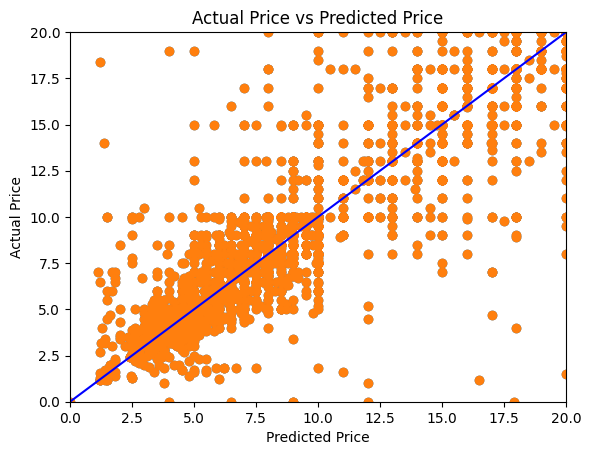

In [20]:
# do a scatter plot of the predicted price vs the actual price
plt.scatter(y_pred, y_test)
plt.ylabel('Actual Price')
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual Price vs Predicted Price')

limits = [np.min([plt.xlim(), plt.ylim()]),  # min of both axes
          np.max([plt.xlim(), plt.ylim()])]  # max of both axes

plt.plot(limits, limits, 'b-')  # 'b-' means blue color, solid line


plt.xlim(0, 20)
plt.ylim(0, 20)
plt.show()

In [21]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare.head(20)

,Actual,Predicted
21632,7.000,8.000
32405,10.000,7.500
45486,5.000,3.300
22090,14.000,14.000
6266,4.200,3.300
44364,4.800,3.000
11668,3.500,4.300
28486,9.000,9.500
14545,10.000,5.500
44336,5.500,4.500


In [22]:
# Save the models into pickle file
import pickle

with open('re_model.pkl', 'wb') as f:
		pickle.dump(re_model, f)

encoders = {
	'le_district': le_district,
	'le_province': le_province,
	'le_ward': le_ward
}
with open('label_encoder.pkl', 'wb') as f:
		pickle.dump(encoders, f)